# RC Hollow Rectangular Section

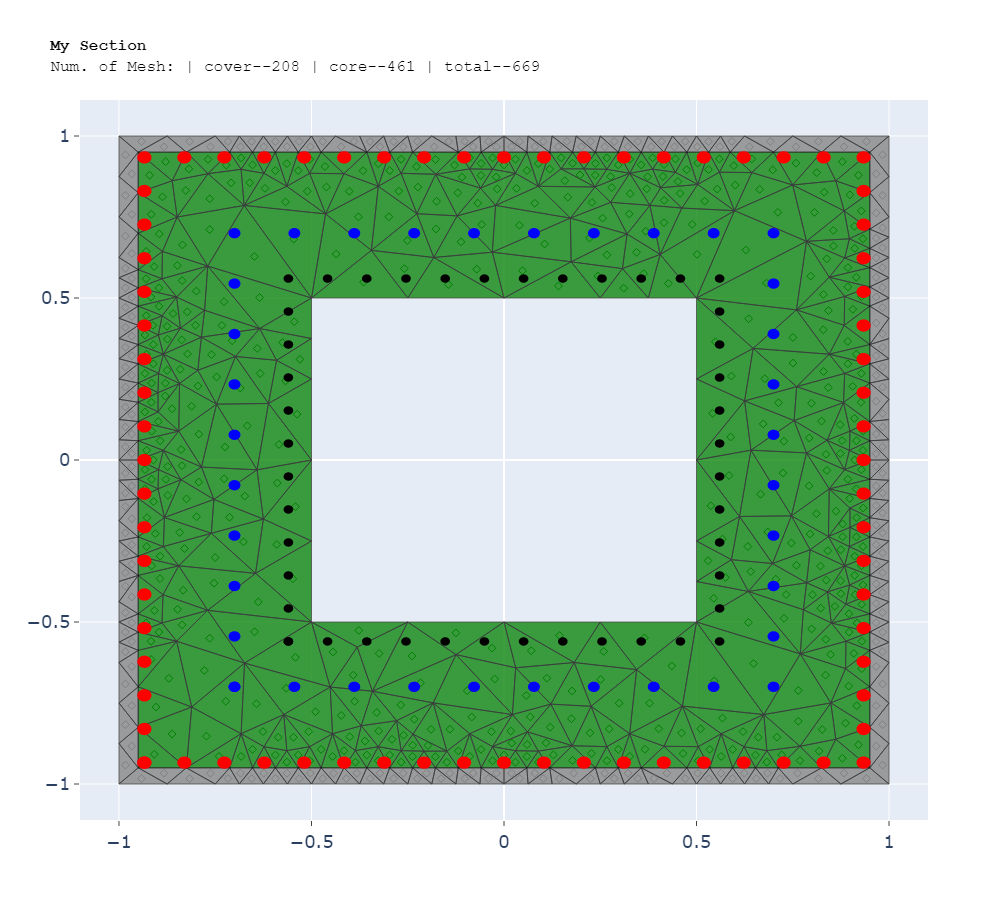

In [1]:
import opstool as opst

outlines = [[0, 0], [2, 0], [2, 2], [0, 2]]
coverlines = opst.offset(outlines, d=0.05)
cover = opst.add_polygon(outlines, holes=[coverlines])
holelines = [[0.5, 0.5], [1.5, 0.5], [1.5, 1.5], [0.5, 1.5]]
core = opst.add_polygon(coverlines, holes=[holelines])
sec = opst.SecMesh()
sec.assign_group(dict(cover=cover, core=core))
sec.assign_mesh_size(dict(cover=0.02, core=0.05))
sec.assign_group_color(dict(cover="gray", core="green"))
sec.mesh()
# add rebars
rebars = opst.Rebars()
rebar_lines1 = opst.offset(outlines, d=0.05 + 0.032 / 2)
rebars.add_rebar_line(
    points=rebar_lines1, dia=0.032, gap=0.1, color="red",
)
rebar_lines2 = opst.offset(holelines, d=-(0.05 + 0.02 / 2))
rebars.add_rebar_line(
    points=rebar_lines2, dia=0.020, gap=0.1, color="black",
)
rebar_lines3 = [[0.3, 0.3], [1.7, 0.3], [1.7, 1.7], [0.3, 1.7]]
rebars.add_rebar_line(
    points=rebar_lines3, dia=0.026, gap=0.15, closure=True,
    color="blue",
)
# add to the sec
sec.add_rebars(rebars)

#----------------------------------------------------------------
sec.get_sec_props(display_results=False, plot_centroids=False)
sec.centring()
# sec.rotate(45)
sec.view(fill=True, engine='plotly', save_html=None, on_notebook=True)